In [163]:
# Import necessary libraries
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sns  # For advanced visualization
from sklearn.model_selection import train_test_split  # To split data into training and test sets
from sklearn.linear_model import LinearRegression  # Linear Regression model
from sklearn.ensemble import RandomForestRegressor  # Random Forest model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # For performance metrics
from sklearn.model_selection import GridSearchCV, cross_val_score  # For hyperparameter tuning (Grid Search)
from sklearn.preprocessing import StandardScaler  # To standardize the features (optional)
from sklearn.svm import SVR
import joblib

In [164]:
# Load the dataset
data = pd.read_csv('real_estate_dataset.csv')

In [165]:
# Outlier Detection using IQR method (add this after missing value handling)
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()
print(f"Outliers detected in each feature:\n{outliers}")

Outliers detected in each feature:
ID                    0
Square_Feet           0
Num_Bedrooms          0
Num_Bathrooms         0
Num_Floors            0
Year_Built            0
Has_Garden            0
Has_Pool              0
Garage_Size           0
Location_Score        0
Distance_to_Center    0
Price                 1
dtype: int64


In [166]:
# 1. Data Exploration and Preprocessing
# Display basic info and first few rows
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  500 non-null    int64  
 1   Square_Feet         500 non-null    float64
 2   Num_Bedrooms        500 non-null    int64  
 3   Num_Bathrooms       500 non-null    int64  
 4   Num_Floors          500 non-null    int64  
 5   Year_Built          500 non-null    int64  
 6   Has_Garden          500 non-null    int64  
 7   Has_Pool            500 non-null    int64  
 8   Garage_Size         500 non-null    int64  
 9   Location_Score      500 non-null    float64
 10  Distance_to_Center  500 non-null    float64
 11  Price               500 non-null    float64
dtypes: float64(4), int64(8)
memory usage: 47.0 KB
None
   ID  Square_Feet  Num_Bedrooms  Num_Bathrooms  Num_Floors  Year_Built  \
0   1   143.635030             1              3           3        1967   
1  

In [155]:
# Drop the 'ID' column as it is not useful for prediction
data = data.drop(['ID'], axis=1)

KeyError: "['ID'] not found in axis"

In [167]:
# Handle missing values by filling them with the median for simplicity
data.fillna(data.median(), inplace=True)

In [168]:
# Check for NaN values in the features and target variable
print("Missing values in features:")
print(data.isna().sum())  # Check for NaN in the features

Missing values in features:
ID                    0
Square_Feet           0
Num_Bedrooms          0
Num_Bathrooms         0
Num_Floors            0
Year_Built            0
Has_Garden            0
Has_Pool              0
Garage_Size           0
Location_Score        0
Distance_to_Center    0
Price                 0
dtype: int64


In [169]:
# 2. Separate features (X) and target variable (y)
X = data.drop(['Price'], axis=1)  # All columns except 'Price' are features
y = data['Price']  # The target variable is 'Price'

In [170]:
# Check for NaN values in the target variable
print("\nMissing values in target (Price):")
print(y.isna().sum())  # Check for NaN in the target


Missing values in target (Price):
0


In [171]:
# One-Hot Encoding (if needed)
X = pd.get_dummies(X, drop_first=True)  # Drop the first column to avoid multicollinearity

In [172]:
# 3. Train-Test Split
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [173]:
# Cross-validation for model evaluation
cv_scores_lr = cross_val_score(lr_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Linear Regression Cross-Validation Scores: {cv_scores_lr}")

Linear Regression Cross-Validation Scores: [-3.96909615e+08 -3.03377285e+08 -3.79528496e+08 -4.19098832e+08
 -3.08744766e+08]


In [174]:
# 4. Feature Scaling (Optional)
# Standardize features to improve model performance (especially for linear models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [175]:
# Save the scaler model
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [176]:
# 5. Model: Linear Regression
# Initialize Linear Regression model
lr_model = LinearRegression()

In [177]:
# Train the Linear Regression model
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [178]:
# Make predictions with Linear Regression
y_pred_lr = lr_model.predict(X_test_scaled)

In [179]:
# Evaluate Linear Regression model
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)  # Square root of MSE gives RMSE
r2_lr = r2_score(y_test, y_pred_lr)

In [180]:
# Print Linear Regression Performance Metrics
print("\nLinear Regression Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae_lr}")
print(f"Mean Squared Error (MSE): {mse_lr}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr}")
print(f"R² (Coefficient of Determination): {r2_lr}")


Linear Regression Performance Metrics:
Mean Absolute Error (MAE): 16900.083327789554
Mean Squared Error (MSE): 438713006.8310048
Root Mean Squared Error (RMSE): 20945.477001753978
R² (Coefficient of Determination): 0.9708338115636109


In [181]:
# 6. Model: Random Forest (Before Hyperparameter Tuning)
# Initialize Random Forest model
rf_model = RandomForestRegressor(random_state=42)

In [182]:
# Train the Random Forest model
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [183]:
# Make predictions with Random Forest
y_pred_rf = rf_model.predict(X_test)

In [184]:
# Evaluate Random Forest model (Before Hyperparameter Tuning)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [185]:
# Print Random Forest Performance Metrics (Before Hyperparameter Tuning)
print("\nRandom Forest (Before Hyperparameter Tuning) Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae_rf}")
print(f"Mean Squared Error (MSE): {mse_rf}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf}")
print(f"R² (Coefficient of Determination): {r2_rf}")


Random Forest (Before Hyperparameter Tuning) Performance Metrics:
Mean Absolute Error (MAE): 42176.95054264998
Mean Squared Error (MSE): 2667932868.923128
Root Mean Squared Error (RMSE): 51652.036445072794
R² (Coefficient of Determination): 0.8226324919046173


In [186]:
# 7. Hyperparameter Tuning for Random Forest (Grid Search)
# Define hyperparameters for Random Forest model tuning
param_grid = {
    'n_estimators': [100, 200],  # Number of trees in the forest
    'max_depth': [10, 20],  # Depth of the trees
    'min_samples_split': [2, 5],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2]  # Minimum samples at a leaf node
}

In [187]:
# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=2)

In [188]:
# Perform Grid Search to find the best hyperparameters
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='neg_mean_squared_error', verbose=2)

In [189]:
# Get the best Random Forest model from Grid Search
best_rf_model = grid_search.best_estimator_

In [190]:
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [191]:
y_pred_best = best_rf_model.predict(X_test)
# Evaluate the model's performance (e.g., using R², MSE, etc.)
from sklearn.metrics import mean_squared_error, r2_score
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)
print(f"Best Model MSE: {mse_best}")
print(f"Best Model R²: {r2_best}")


Best Model MSE: 2796755163.1353545
Best Model R²: 0.8140682249480895


In [192]:
# Make predictions with the tuned Random Forest model
y_pred_rf_tuned = best_rf_model.predict(X_test)

In [193]:
# Evaluate the Random Forest model after hyperparameter tuning
mae_rf_tuned = mean_absolute_error(y_test, y_pred_rf_tuned)
mse_rf_tuned = mean_squared_error(y_test, y_pred_rf_tuned)
rmse_rf_tuned = np.sqrt(mse_rf_tuned)
r2_rf_tuned = r2_score(y_test, y_pred_rf_tuned)

In [194]:
# Print Random Forest Performance Metrics (After Hyperparameter Tuning)
print("\nRandom Forest (After Hyperparameter Tuning) Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae_rf_tuned}")
print(f"Mean Squared Error (MSE): {mse_rf_tuned}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf_tuned}")
print(f"R² (Coefficient of Determination): {r2_rf_tuned}")


Random Forest (After Hyperparameter Tuning) Performance Metrics:
Mean Absolute Error (MAE): 43252.70057158617
Mean Squared Error (MSE): 2796755163.1353545
Root Mean Squared Error (RMSE): 52884.35650677197
R² (Coefficient of Determination): 0.8140682249480895


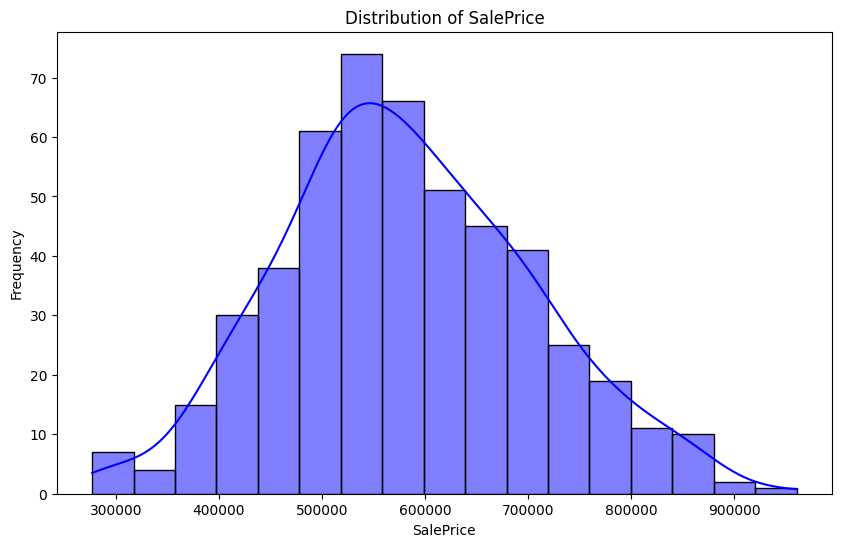

In [195]:
# 7. Data Visualization

# Distribution of SalePrice (Target variable)
plt.figure(figsize=(10, 6))
sns.histplot(y, kde=True, color='blue')
plt.title("Distribution of SalePrice")
plt.xlabel("SalePrice")
plt.ylabel("Frequency")
plt.show()

In [196]:
print(data.columns)

Index(['ID', 'Square_Feet', 'Num_Bedrooms', 'Num_Bathrooms', 'Num_Floors',
       'Year_Built', 'Has_Garden', 'Has_Pool', 'Garage_Size', 'Location_Score',
       'Distance_to_Center', 'Price'],
      dtype='object')


In [197]:
data.columns = data.columns.str.strip()

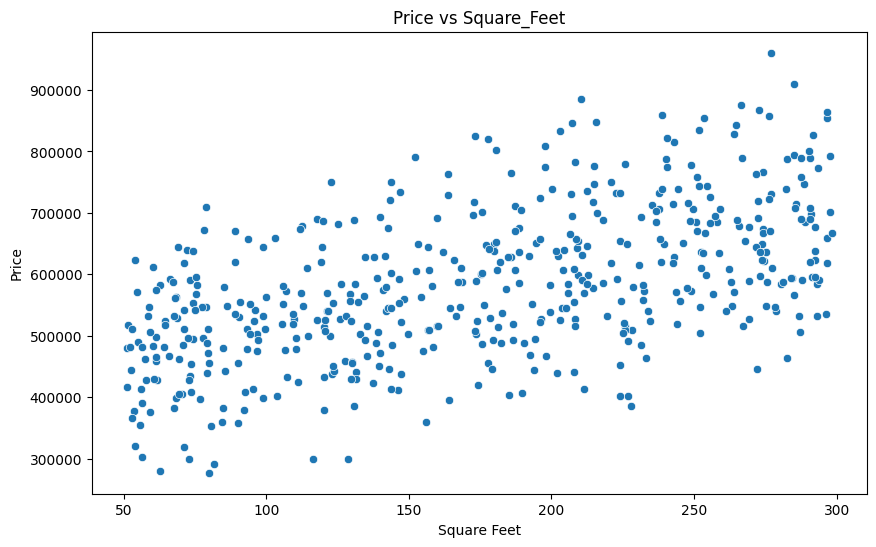

In [198]:
# Scatter Plot: Square_Feet vs. Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Square_Feet'], y=data['Price'])
plt.title("Price vs Square_Feet")
plt.xlabel("Square Feet")
plt.ylabel("Price")
plt.show()

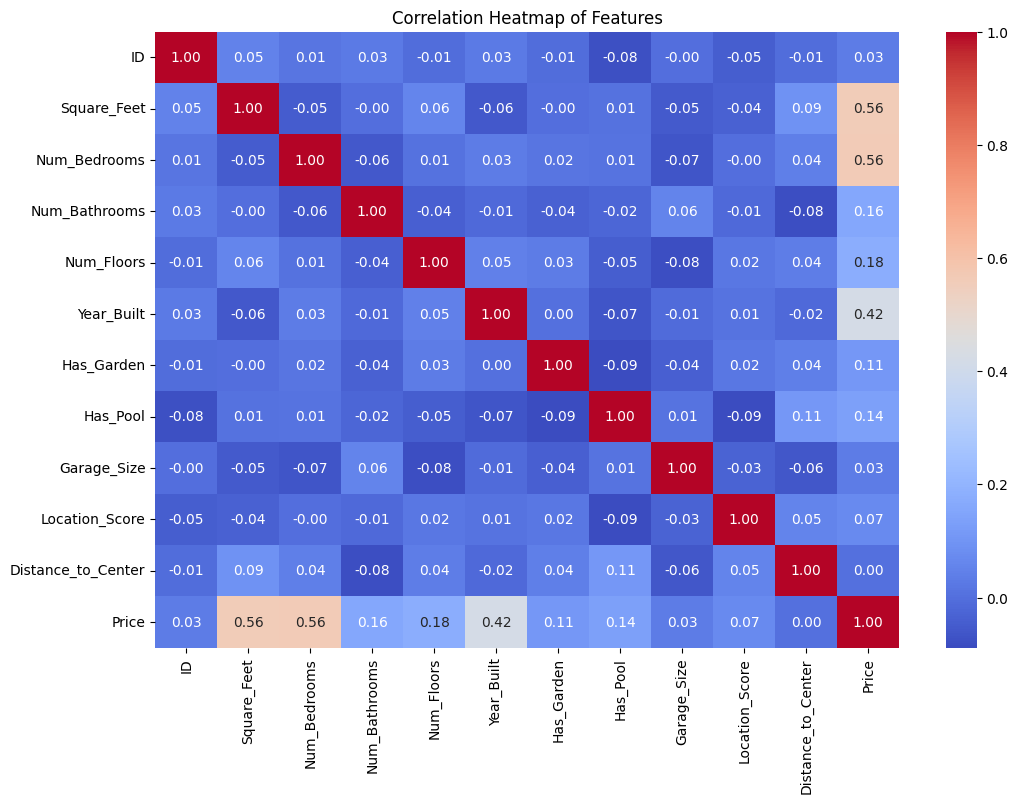

In [199]:
# Correlation Heatmap of Features
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()

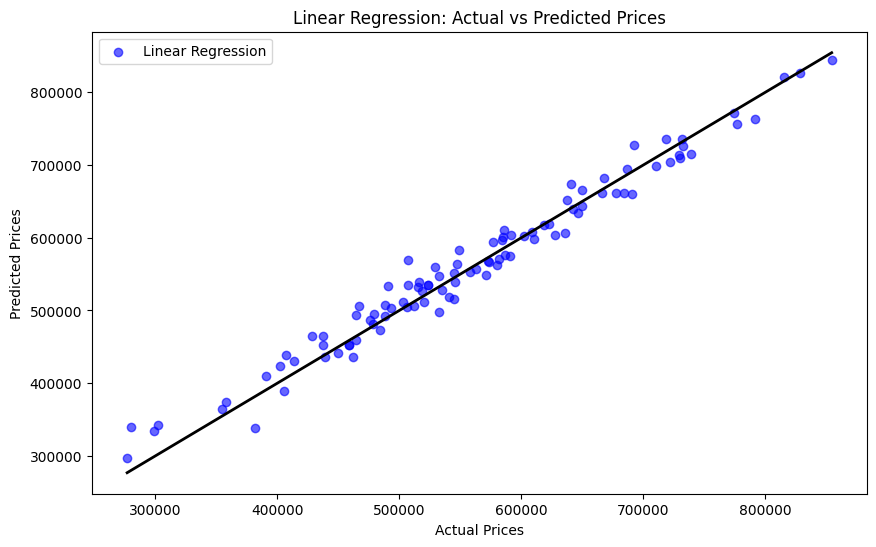

In [200]:
# Actual vs Predicted Plot for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, color='blue', label='Linear Regression', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Linear Regression: Actual vs Predicted Prices')
plt.legend()
plt.show()

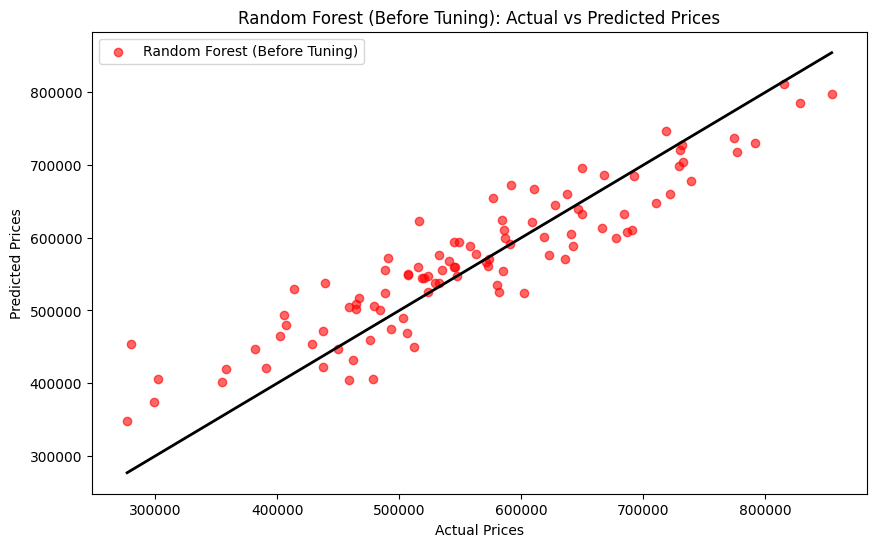

In [201]:
# Actual vs Predicted Plot for Random Forest (Before Tuning)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='red', label='Random Forest (Before Tuning)', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Random Forest (Before Tuning): Actual vs Predicted Prices')
plt.legend()
plt.show()

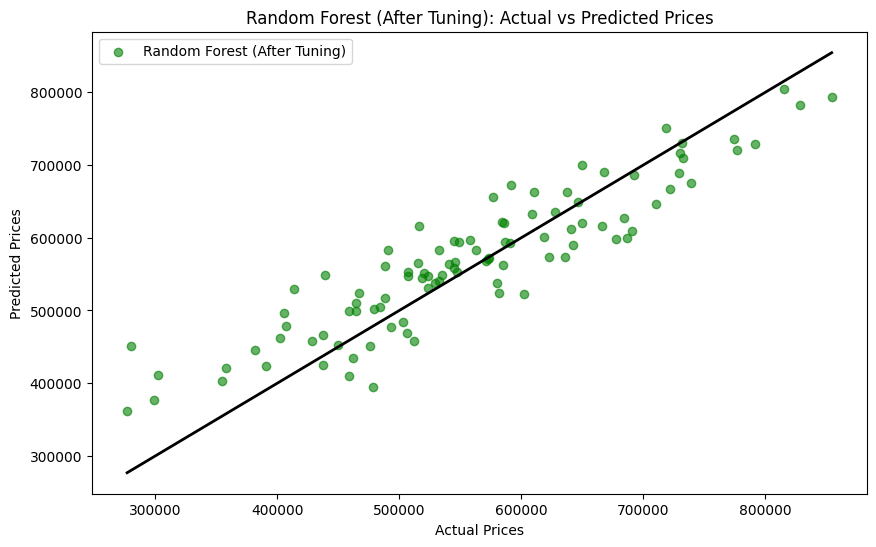

In [202]:
# Actual vs Predicted Plot for Random Forest (After Tuning)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf_tuned, color='green', label='Random Forest (After Tuning)', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Random Forest (After Tuning): Actual vs Predicted Prices')
plt.legend()
plt.show()

In [203]:
# If there's a categorical column (like 'Location_Score' or similar), apply one-hot encoding
data = pd.get_dummies(data, drop_first=True)  # Drop the first category to avoid multicollinearity

In [204]:
# Linear Regression Cross-Validation
lr_cv_scores = cross_val_score(lr_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Linear Regression CV Scores: {lr_cv_scores}")
print(f"Linear Regression CV Mean Score: {lr_cv_scores.mean()}")

Linear Regression CV Scores: [-3.94520856e+08 -3.09167106e+08 -3.82381574e+08 -4.24439454e+08
 -3.08726445e+08]
Linear Regression CV Mean Score: -363847086.9624625


In [205]:
#Model Comparison:
# Train an SVR Model
svr_model = SVR()
svr_model.fit(X_train_scaled, y_train)

# Make Predictions
y_pred_svr = svr_model.predict(X_test_scaled)

# Evaluate SVR Model
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, y_pred_svr)

# Print SVR Performance Metrics
print("\nSupport Vector Regression Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae_svr}")
print(f"Mean Squared Error (MSE): {mse_svr}")
print(f"Root Mean Squared Error (RMSE): {rmse_svr}")
print(f"R² (Coefficient of Determination): {r2_svr}")


Support Vector Regression Performance Metrics:
Mean Absolute Error (MAE): 100394.88861195013
Mean Squared Error (MSE): 15601543700.14585
Root Mean Squared Error (RMSE): 124906.1395614557
R² (Coefficient of Determination): -0.03721010403572422


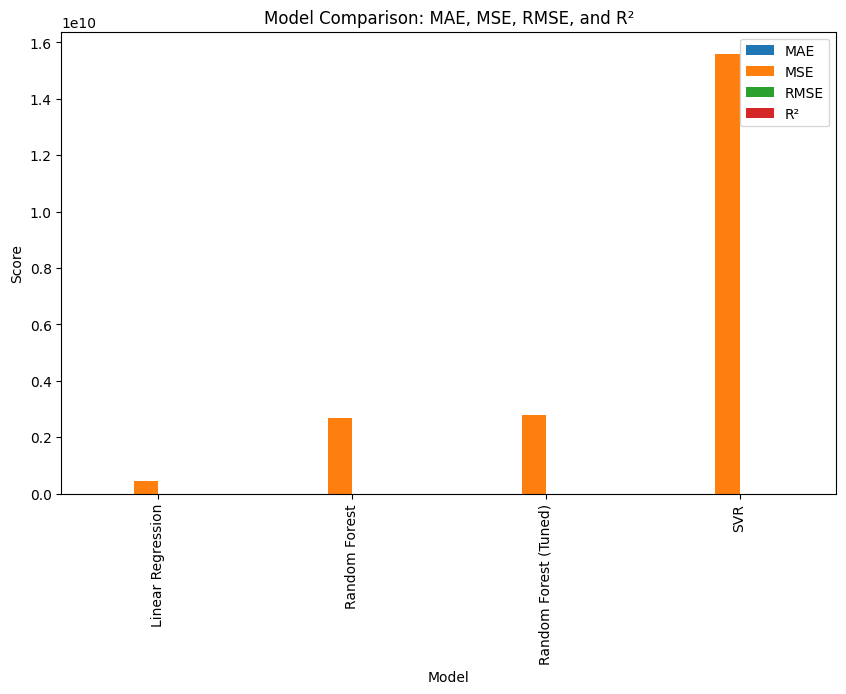

In [206]:
#Evaluation Metrics Visualization:
# Create a dictionary to store performance metrics
models = ['Linear Regression', 'Random Forest', 'Random Forest (Tuned)', 'SVR']
mae_scores = [mae_lr, mae_rf, mae_rf_tuned, mae_svr]
mse_scores = [mse_lr, mse_rf, mse_rf_tuned, mse_svr]
rmse_scores = [rmse_lr, rmse_rf, rmse_rf_tuned, rmse_svr]
r2_scores = [r2_lr, r2_rf, r2_rf_tuned, r2_svr]

# Create a DataFrame for easy plotting
metrics_df = pd.DataFrame({
    'Model': models,
    'MAE': mae_scores,
    'MSE': mse_scores,
    'RMSE': rmse_scores,
    'R²': r2_scores
})

# Plot the performance metrics
metrics_df.set_index('Model').plot(kind='bar', figsize=(10, 6))
plt.title("Model Comparison: MAE, MSE, RMSE, and R²")
plt.ylabel("Score")
plt.show()

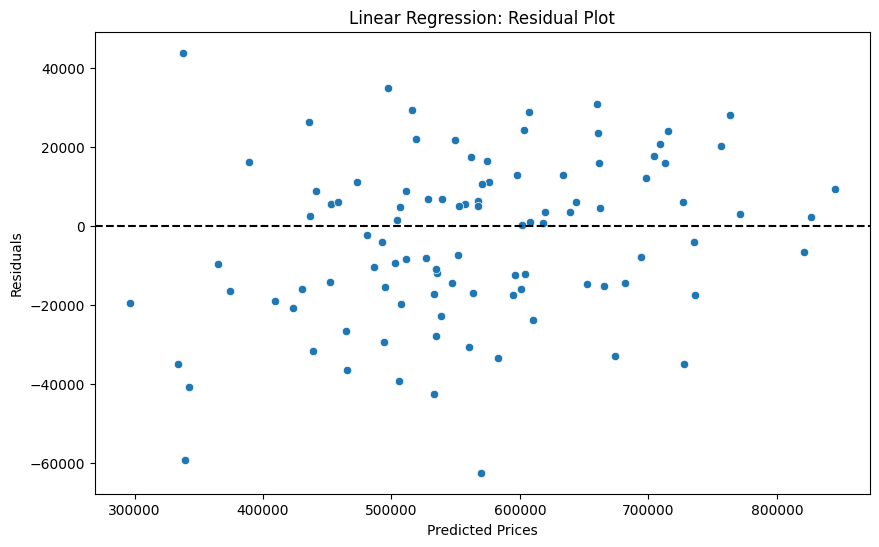

In [207]:
# Residual Plot for Linear Regression
residuals_lr = y_test - y_pred_lr
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_lr, y=residuals_lr)
plt.axhline(y=0, color='black', linestyle='--')
plt.title("Linear Regression: Residual Plot")
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.show()

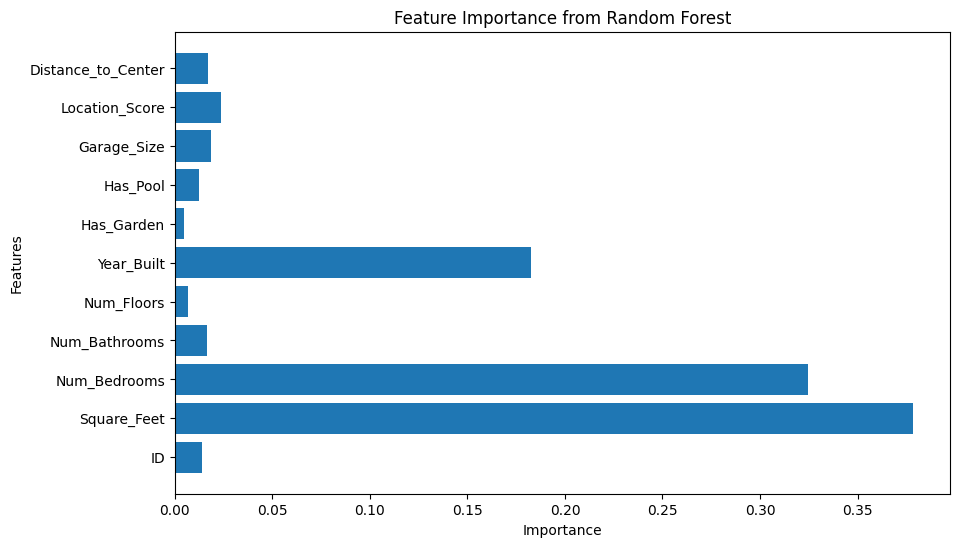

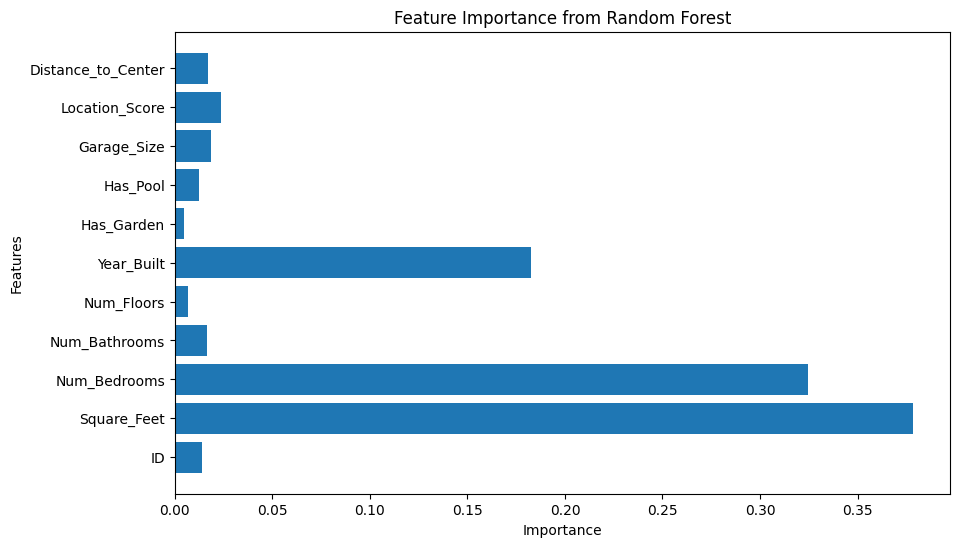

In [208]:
# Get feature importance from the Random Forest model (after tuning)
feature_importance = best_rf_model.feature_importances_

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importance)
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()
# Get feature importance from the Random Forest model (after tuning)
feature_importance = best_rf_model.feature_importances_

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importance)
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


In [209]:
# Save the tuned Random Forest model
joblib.dump(best_rf_model, 'random_forest_model.pkl')

['random_forest_model.pkl']